In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("C:/Users/carro/OneDrive/Escritorio/CUNEF/Aprendizaje Automático/machine_learning_supervisado/datasets/bfi.csv")
df.head()

,rownames,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


In [3]:
# Dropping unnecessary columns
df.drop(['rownames', 'gender', 'education', 'age'],axis=1,inplace=True)
# Dropping missing values rows
df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2436 entries, 0 to 2799
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      2436 non-null   float64
 1   A2      2436 non-null   float64
 2   A3      2436 non-null   float64
 3   A4      2436 non-null   float64
 4   A5      2436 non-null   float64
 5   C1      2436 non-null   float64
 6   C2      2436 non-null   float64
 7   C3      2436 non-null   float64
 8   C4      2436 non-null   float64
 9   C5      2436 non-null   float64
 10  E1      2436 non-null   float64
 11  E2      2436 non-null   float64
 12  E3      2436 non-null   float64
 13  E4      2436 non-null   float64
 14  E5      2436 non-null   float64
 15  N1      2436 non-null   float64
 16  N2      2436 non-null   float64
 17  N3      2436 non-null   float64
 18  N4      2436 non-null   float64
 19  N5      2436 non-null   float64
 20  O1      2436 non-null   float64
 21  O2      2436 non-null   int64  
 22  O3   

In [5]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(np.float64(18146.06557723504), np.float64(0.0))

El P-valor es 0, por lo que es estadísiticamente significante y la matriz de correlación está muy lejos de la identidad.

In [6]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)

print(kmo_model)

0.8486452309468394


El KMO general para nuestros datos es 0.84, que es muy bueno. Por ello, podemos seguir adelante con el análisis factorial propiamente dicho.

In [8]:
from factor_analyzer import FactorAnalyzer

# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(df)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

c:\Users\carro\anaconda3\envs\cunef\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

Vemos que sólo hay 6 autovalores mayores que 1, por lo que podemos elegir 6 como el número de factores.

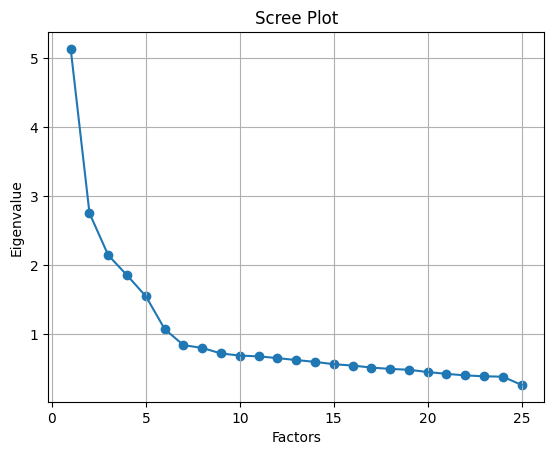

In [9]:
# Create scree plot
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [10]:
fa = FactorAnalyzer(n_factors=6, rotation="varimax")

fa.fit(df)

c:\Users\carro\anaconda3\envs\cunef\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,n_factors,6
,rotation,'varimax'
,method,'minres'
,use_smc,True
,is_corr_matrix,False
,bounds,"(0.005, ...)"
,impute,'median'
,svd_method,'randomized'
,rotation_kwargs,{}


In [11]:
fa.loadings_

array([[ 9.52197424e-02,  4.07831575e-02,  4.87338850e-02,
        -5.30987350e-01, -1.13057329e-01,  1.61216352e-01],
       [ 3.31312761e-02,  2.35538041e-01,  1.33714395e-01,
         6.61140976e-01,  6.37337869e-02, -6.24353601e-03],
       [-9.62088418e-03,  3.43008176e-01,  1.21353367e-01,
         6.05932693e-01,  3.39902655e-02,  1.60106428e-01],
       [-8.15175586e-02,  2.19716722e-01,  2.35139532e-01,
         4.04594038e-01, -1.25338020e-01,  8.63557038e-02],
       [-1.49615885e-01,  4.14457676e-01,  1.06382165e-01,
         4.69698289e-01,  3.09765730e-02,  2.36519342e-01],
       [-4.35840210e-03,  7.72477527e-02,  5.54582256e-01,
         7.51069502e-03,  1.90123730e-01,  9.50350463e-02],
       [ 6.83300838e-02,  3.83703847e-02,  6.74545451e-01,
         5.70549868e-02,  8.75925918e-02,  1.52775080e-01],
       [-3.99936734e-02,  3.18673013e-02,  5.51164438e-01,
         1.01282240e-01, -1.13380869e-02,  8.99628311e-03],
       [ 2.16283366e-01, -6.62407732e-02, -6.384

In [12]:
loadings_df = pd.DataFrame(data=fa.loadings_, 
             index=df.columns)

loadings_df

,0,1,2,3,4,5
A1,0.095220,0.040783,0.048734,-0.530987,-0.113057,0.161216
A2,0.033131,0.235538,0.133714,0.661141,0.063734,-0.006244
A3,-0.009621,0.343008,0.121353,0.605933,0.033990,0.160106
A4,-0.081518,0.219717,0.235140,0.404594,-0.125338,0.086356
A5,-0.149616,0.414458,0.106382,0.469698,0.030977,0.236519
C1,-0.004358,0.077248,0.554582,0.007511,0.190124,0.095035
C2,0.068330,0.038370,0.674545,0.057055,0.087593,0.152775
C3,-0.039994,0.031867,0.551164,0.101282,-0.011338,0.008996
C4,0.216283,-0.066241,-0.638475,-0.102617,-0.143846,0.318359
C5,0.284187,-0.180812,-0.544838,-0.059955,0.025837,0.132423


- Factor 0: cargas altas para N1,N2,N3,N4, and N5 (Neuroticism)
- Factor 1: cargas altas para E1,E2,E3,E4, and E5 (Extraversion)
- Factor 2: cargas altas para C1,C2,C3,C4, and C5 (Conscientiousness)
- Factor 3: cargas altas para A1,A2,A3,A4, and A5 (Agreeableness)
- Factor 4: cargas altas para O1,O2,O3,O4, and O5 (Opennness)
- Factor 5: no tiene ninguna carga muy alta, por lo tanto no es muy interpretable. Sería mejor en este caso hacer el análisis de factores con sólo 5 factores.

In [13]:
# Varianza de cada factor
# Información de la varianza de los factores, incluyendo la varianza, la varianza proporcional y la varianza acumulada para cada factor
fa.get_factor_variance()

(array([2.7269887 , 2.60223901, 2.07347064, 1.71349909, 1.50483135,
        0.63029714]),
 array([0.10907955, 0.10408956, 0.08293883, 0.06853996, 0.06019325,
        0.02521189]),
 array([0.10907955, 0.21316911, 0.29610793, 0.3646479 , 0.42484115,
        0.45005304]))

In [17]:
fa = FactorAnalyzer(n_factors=5, rotation="promax")

fa.fit(df)

c:\Users\carro\anaconda3\envs\cunef\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,n_factors,5
,rotation,'promax'
,method,'minres'
,use_smc,True
,is_corr_matrix,False
,bounds,"(0.005, ...)"
,impute,'median'
,svd_method,'randomized'
,rotation_kwargs,{}


In [18]:
fa.loadings_

array([[ 1.48768542e-01,  1.23084326e-01,  6.44032727e-02,
        -4.62434911e-01, -5.81370207e-02],
       [ 4.58688498e-02,  1.18225046e-01,  6.50852945e-02,
         6.11390364e-01, -5.23518651e-03],
       [ 3.69422834e-02,  2.36289338e-01,  1.02801768e-02,
         6.20666270e-01, -1.49680492e-02],
       [-2.70230953e-02,  1.20078023e-01,  1.88161092e-01,
         4.10571524e-01, -1.74479542e-01],
       [-8.45239824e-02,  3.31436967e-01, -3.08735954e-02,
         4.89399288e-01,  6.99400191e-03],
       [ 7.26755159e-02, -2.99089947e-02,  5.66751890e-01,
        -2.84243422e-02,  1.59010983e-01],
       [ 1.61592234e-01, -8.96588379e-02,  6.96709606e-01,
         4.00953374e-02,  4.78276954e-02],
       [ 3.01050681e-02, -9.17757961e-02,  5.97382259e-01,
         6.59596289e-02, -6.27462642e-02],
       [ 1.72850214e-01,  6.97979915e-02, -6.52328810e-01,
         2.88474846e-02, -5.71159128e-02],
       [ 2.09140093e-01, -6.85582598e-02, -5.60836205e-01,
         2.56259168e-02

In [19]:
loadings_df = pd.DataFrame(data=fa.loadings_, 
             index=df.columns)

loadings_df

,0,1,2,3,4
A1,0.148769,0.123084,0.064403,-0.462435,-0.058137
A2,0.045869,0.118225,0.065085,0.611390,-0.005235
A3,0.036942,0.236289,0.010280,0.620666,-0.014968
A4,-0.027023,0.120078,0.188161,0.410572,-0.174480
A5,-0.084524,0.331437,-0.030874,0.489399,0.006994
C1,0.072676,-0.029909,0.566752,-0.028424,0.159011
C2,0.161592,-0.089659,0.696710,0.040095,0.047828
C3,0.030105,-0.091776,0.597382,0.065960,-0.062746
C4,0.172850,0.069798,-0.652329,0.028847,-0.057116
C5,0.209140,-0.068558,-0.560836,0.025626,0.088733


- Factor 0: cargas altas para N1,N2,N3,N4, and N5 (Neuroticism)
- Factor 1: cargas altas para E1,E2,E3,E4, and E5 (Extraversion)
- Factor 2: cargas altas para C1,C2,C3,C4, and C5 (Conscientiousness)
- Factor 3: cargas altas para A1,A2,A3,A4, and A5 (Agreeableness)
- Factor 4: cargas altas para O1,O2,O3,O4, and O5 (Opennness)
- Factor 5: no tiene ninguna carga muy alta, por lo tanto no es muy interpretable. Sería mejor en este caso hacer el análisis de factores con sólo 5 factores.

# Ventajas y limitaciones
## Ventajas
- Reducción de los datos: Puede reducir un gran número de variables observadas en un número más reducido de factores, lo que simplifica el análisis.
- Identifica la estructura: Revela relaciones subyacientes o construcciones latentes entre variables.
- Mejora la interpretabilidad al simplificar un dataset complejo agrupando variables correladas.
- Elimina la multicolinealidad.
## Limitaciones
- Requiere la elección del número de facores y del método de rotación.
- Necesita bastantes datos para producir resultados estables.
- Asume que las relaciones entre las variables son lineales, lo cual no es siempre cierto.
- Sensible a outliers.
## Cuándo usar FA
- Contraste de hipótesis.